In [1]:
%matplotlib inline

In [2]:
import math
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import integrate, linalg

# Aerodynamics of Airfoil and simplified metods to calculate forces and moments.

## FUNDAMENTAL AERODYNAMIC VARIABLES
We can't continue forward  without clearly stating the four fundamental physical variables: *pressure, density, temperature, and flow velocity.*

Consider a surface immersed in a fluid and the molecules of the fluid are constantly in motion. Pressure is the normal force per unit area exerted on a surface due to the time rate of change of momentum of the gas molecules impacting on (or crossing) that surface. It is important to note that even though pressure is defined as force “per unit area,” you do not need a surface that has a scalar value to talk about pressure. In fact, pressure is usually defined at a point in the fluid or a point on a solid surface and can vary from one point to another. To see this more clearly, consider a point
B in a volume of fluid. Let 
<center>$dA = $ elemental area at $B$</center>
<center>$dF = $ force on one side of $dA$ due to pressure</center>
Then, the pressure at point B in the fluid is defined as

$$ p = \lim_{dA\to 0} \frac{(dF)}{(dA)} $$

The pressure $p$ is the limiting form of the force per unit area, where the area of interest has shrunk to nearly zero at the point B (*Note: $dA$ can never achieve the limit of zero, because there would be no molecules at point $B$ in that case. The above limit should be interpreted as $dA$ approaching a very small value, near zero, but sufficiently larger than the average spacing between molecules).* Clearly, you can see that pressure is a point property and can have a different value from one point to another in the fluid.

Density is defined as the mass per unit volume. Analogous to our discussion on pressure, the definition of density
does not require an actual volume. Rather, it is a point property that can vary from point to point in the fluid. Again, consider a point B in the fluid. Let
<center>$dv = $ elemental volume around $B$</center>
<center>$dm = $ mass of fluid inside $dv$</center>
Then, the density at point $B$ is

$$ \rho = \lim_{dv\to 0} \frac{(dm)}{(dv)} $$

Therefore, the density $\rho$ is the limiting form of the mass per unit volume, where the volume of interest has shrunk to nearly zero around point B. (*Note: $dv$ cannot achieve the value of zero for the reason discussed above concerning $dA$ in the definition of pressure).*

Temperature takes on an important role in high-speed aerodynamics. Although, in high speed, the analysis becomes exponentialy dificult, and is outside of our scope, we need to state same basics.
The temperature $T$ of a gas can be expressed using Kinetic theory approach (wikipedia).
The magnitude of the kelvin is now defined in terms of kinetic theory, derived from the value of the Boltzmann constant.
Each classical degree of freedom of a freely moving particle has an average kinetic energy of $\frac{{k_B}T}{2}$ where $k_B$ denotes the Boltzmann constant. The translational motion of the particle has three degrees of freedom, so that, the average translational kinetic energy of a freely moving particle in a system with temperature $T$ will be $\frac{3{k_B}T}{2}$.

A fluid is not solid, so while in motion, one part of the fluid may be traveling at a different velocity from another part. Hence, we have to adopt a certain perspective, as follows. Consider the flow of air over an airfoil. Flow velocity is a vector field used to mathematically describe the motion of a continuum. The flow velocity $V$ has both magnitude and direction; hence, it is a vector quantity. This is in contrast to $p$, $\rho$, and $T$, which are scalar variables. The scalar magnitude of $\vec{V}$ is frequently used and is denoted by $V$. Again, we emphasize that velocity is a point property and can vary from point to point in the flow.

A moving fluid element traces out a fixed path in space. As long as the flow is steady (i.e., as long as it does not fluctuate with time), this path is called a streamline of the flow (see fig.1). Drawing the streamlines of the flow field is an important way of visualizing the motion of the gas.


<img src="Image\Inviscid_flow_around_a_cylinder.gif" style="max-height:260px" /> 

Figure 1. *The color indicates pressure. Dark blue means high pressure.*

Friction acts internally in a flow. Consider two adjacent streamlines $a$ and $b$ as sketched in fig. 2 The streamlines are an infinitesimal distance, $dy$, apart. At point 1 on streamline $b$, the flow velocity is $V$; at point 2 on streamline $a$, the flow velocity is slightly higher, $V + dV$. You can imagine that streamline $a$ is rubbing against streamline $b$ and, due to friction, exerts a force of magnitude $dF_f$ on streamline $b$ acting tangentially toward the right. Furthermore, imagine this force acting on an elemental area $dA$, where $dA$ is perpendicular to the $y$ axis and tangent to the streamline $b$ at point 1. The local shear stress, $\tau$, at point 1 is $$\tau = \lim_{dA\to 0} \frac{(dF_f)}{(dA)}$$
The shear stress $\tau$ is the limiting form of the magnitude of the frictional force per unit area, where the area of interest is perpendicular to the $y$ axis and has shrunk to nearly zero at point 1.

<img src="Image/fig.2.png" style="max-height:260px" />

Figure 2. *Generation of frictional force due to a velocity gradient in a flow*

Shear stress acts tangentially along the streamline and the value of the shear stress at a point on a streamline is proportional to the spatial rate of change of velocity normal to the streamline at that point (i.e., for the flow illustrated in Fig. 2, $\tau \propto \frac {dV}{dy}$. The constant of proportionality is defined
as the viscosity coefficient, $\mu$. Hence,
$$\tau = \mu\frac{dv}{dy}$$
where $\frac{dV}{dy}$ is the velocity gradient. In reality, $\mu$ is not really a constant; it is a function of the temperature of the fluid. From the above equation, we deduce that in regions of a flow field where the velocity gradients are small, $\tau$ is small and the influence of friction locally in the flow is small. On the other hand, in regions where the velocity gradients are large, $\tau$ is large and the influence of friction locally in the flow can be substantial.

## The aerodynamic forces and moments on the body are due to only two basic sources:

1. Pressure distribution over the body surface
2. Shear stress distribution over the body surface

The only mechanisms nature has for communicating a force to a body moving through a fluid are pressure and shear stress distributions on the body surface. Both pressure $p$ and shear stress $\tau$ have dimensions of force per unit area. As sketched in Figure 3, $p$ acts normal to the surface, and $\tau$ acts tangential to the surface. Shear stress is due to the friction between the body and the air.

<img src="Image/fig.3.png" style="max-height:260px" />

Figure 3. *Illustration of pressure and shear stress on an aerodynamic surface.*

The net effect of the $p$ and $\tau$ distributions integrated over the complete body surface is a resultant aerodynamic force $\vec{R}$ and moment $M$ on the body. In turn, the resultant $\vec{R}$ can be split into components as shown in Figure 4. $V_{\infty}$ is the relative wind, defined as the flow velocity far ahead of the body. The flow far away from the body is called the **freestream**, and hence $V_{\infty}$ is also called the freestream velocity. In Figure 4, by definition,

$$\textrm{Lift}(L) \equiv \textrm{ component of } R  \textrm{ perpendicular to } V_\infty$$

$$\textrm{Drag}(D) \equiv \textrm{ component of } R  \textrm{ parallel to } V_\infty$$

<img src="Image/fig.4.png" style="max-height:260px" />

Figure 4. *Resultant aerodynamic force and the components into which it splits.*

The chord $c$ is the linear distance from the leading edge to the trailing edge of the body. Sometimes, $\vec{R}$ is split into components perpendicular and parallel to the chord, as also shown in Figure 4. By definition,

$$N \equiv \textrm{ normal force } \equiv \textrm{ component of }R  \textrm{ perpendicular to } c$$

$$A \equiv \textrm{ axial force } \equiv \textrm{ component of }R  \textrm{ parallel to } c$$

The angle of attack $\alpha$ is defined as the angle between $c$ and $V_{\infty}$. Hence, $\alpha$ is also the angle between $L$ and $N$ and between $D$ and $A$.

$$L = N\cos{\alpha} - A\sin{\alpha}\tag{1}$$
$$D = N\sin{\alpha} + A\cos{\alpha}\tag{2}$$

Let us examine in more detail the integration of the pressure and shear stress distributions to obtain the aerodynamic forces and moments. Consider the two-dimensional body sketched in Figure 5. The chord line is drawn horizontally, and hence the relative wind is inclined relative to the horizontal by the angle of attack $\alpha$.

<img src="Image/fig.5.png" style="max-height:260px" /> 

Figure 5. *Integration of pressure and shear stress distributions over a two-dimensional body surface.*

An $xy$ coordinate system is oriented parallel and perpendicular, respectively, to the chord. The distance from the leading edge measured along the body surface to an arbitrary point A on the upper surface is $s_u$; similarly, the distance to an arbitrary point $B$ on the lower surface is $s_l$. The pressure and shear stress on the upper surface are denoted by $p_u$ and $\tau_u$, both $p_u$ and $\tau_u$ are functions of $s_u$. Similarly, $p_l$ and  $\tau_l$ are the corresponding quantities on the lower surface and are functions of $s_l$. At a given point, the pressure is normal to the surface and
is oriented at an angle $\theta$ relative to the perpendicular; shear stress is tangential to the surface and is oriented at the same angle $\theta$ relative to the horizontal. In Figure 5, the sign convention for $\theta$ is positive when measured clockwise from the vertical line to the direction of $p$ and from the horizontal line to the direction of $\tau$. In Figure 5, all thetas are shown in their positive direction. Now consider the two-dimensional shape in Figure 5 as a cross section of an infinitely long cylinder of uniform section. A unit span of such a cylinder is shown in Figure 6. Consider an elemental surface area $dS$ of this cylinder, we are interested in the contribution to the total normal force $N'$ and the total axial force $A'$ due to the pressure and shear stress on the elemental area $dS$. 

<img src="Image/fig.6.png" style="max-height:260px" /> 

Figure 6. *Aerodynamic force on an element of the body surface*

The primes on $N'$ and $A'$ denote force per unit span. Examining both Figures 5 and 6, we see that the elemental normal and axial forces acting on the elemental surface $dS$ on the upper body surface are

$$dN'_u = -p_uds_u\cos{\theta} - \tau_uds_u\sin{\theta}\tag{3}$$
$$dA'_u = -p_uds_u\sin{\theta} + \tau_uds_u\cos{\theta}\tag{4}$$

On the lower body surface, we have
$$dN'_l = p_lds_l\cos{\theta} - \tau_lds_l\sin{\theta}\tag{5}$$
$$dA'_l = p_lds_l\sin{\theta} + \tau_lds_l\cos{\theta}\tag{6}$$

In Equations shown above the positive directions of $N'$ and $A'$ are those shown in Figure 4. In these equations, the positive clockwise convention for $\theta$ must be followed. For example, consider again Figure 5. Near the leading edge of the body, where the slope of the upper body surface is positive, $\tau$ is inclined upward, and hence it gives a positive contribution to $N'$. For an upward inclined $\tau$, $\theta$ would be counterclockwise, hence negative. Therefore, $\sin{\theta}$ would be negative, making the shear stress term (the last term) a positive value, as it should be in this instance. Hence, the above equations hold in general (for both the forward and rearward portions of the body) as long as the above sign convention for $\theta$ is consistently applied. The total normal and axial forces per unit span are obtained by integrating the equations from the leading edge (LE) to the trailing edge (TE):

$$N' = -\int_{TE}^{LE} (p_u \cos{\theta} + \tau_u \sin{\theta}) ds_u + \int_{TE}^{LE} (p_l \cos{\theta} - \tau_l \sin{\theta}) ds_l \tag{7}$$

$$A' = \int_{TE}^{LE} (-p_u \sin{\theta} + \tau_u \cos{\theta}) ds_u + \int_{TE}^{LE} (p_l \sin{\theta} + \tau_l \cos{\theta}) ds_l \tag{8}$$

In turn, the total lift and drag per unit span can be obtained by inserting Equations (7) and (8) into (1) and (2); note that Equations (1) and (2) hold
for forces on an arbitrarily shaped body (unprimed) and for the forces per unit span (primed).
The aerodynamic moment exerted on the body depends on the point about which moments are taken. Consider moments taken about the leading edge. By convention, moments that tend to increase $\alpha$ (pitch up) are positive, and moments that tend to decrease $\alpha$ (pitch down) are negative. The moment per unit span about the leading edge due to $p$ and $\tau$ on the elemental area $dS$ on the upper surface is

$$dM'_{u} = (p_{u} \cos \theta + \tau_{u} \sin \theta) x\, ds_{u} - (p_{u} \sin \theta - \tau_{u} \cos \theta) y\, ds_{u} \tag{9}$$

On the bottom surface,

$$dM'_{l} = (- p_{l} \cos \theta + \tau_{l} \sin \theta) x\, ds_{l} + (p_{l} \sin \theta + \tau_{l} \cos \theta) y\, ds_{l} \tag{10}$$

In Equations (9) and (10), note that the same sign convention for $\theta$ applies as before and that $y$ is a positive number above the chord and a negative number below the chord. Integrating Equations (9) and (10) from the leading to the trailing edges, we obtain for the moment about the leading edge per unit span

$$M'_{LE} = \int_{TE}^{LE} \left[(p_{u} \cos \theta + \tau_{u} \sin \theta)x - (p_{u} \sin \theta - \tau_{u} \cos \theta)y \right] ds_{u} + \int_{TE}^{LE} \left[(-p_{l} \cos \theta + \tau_{l} \sin \theta)x + (p_{l} \sin \theta + \tau_{l} \cos \theta)y \right] ds_{l} \tag{11}$$

In Equations (7), (8), and (11), $\theta$, $x$, and $y$ are known functions of $s$ for a given body shape. Hence, if $p_u$, $p_l$, $\tau_u$, and $\tau_l$ are known as functions of
$s$ (from theory or experiment), the integrals in these equations can be evaluated. Clearly, Equations (7), (8), and (11) demonstrate the principle stated earlier, namely, the sources of the aerodynamic lift, drag, and moments on a body are the pressure and shear stress distributions integrated over the body. A major goal of theoretical aerodynamics is to calculate $p(s)$ and $\tau(s)$ for a given body shape and freestream conditions, thus yielding the aerodynamic forces and moments via Equations (7), (8), and (11).

A bilding stone for the aerodynamic are the dimensionless force and moment coefficients. Let $\rho_\infty$ and $V_\infty$ be the density and velocity, respectively, in the freestream, far ahead of the body. We define a dimensional quantity called the freestream dynamic pressure as

Dynamic pressure: $$q_{\infty} {\equiv} {\frac{1}{2}}{\rho_\infty}{V_\infty^2}$$

The dynamic pressure has the units of pressure - newtons per square meter. In addition, let $S$ be a reference area and $l$ be a reference length. The dimensionless force and moment coefficients are defined as follows:

Lift coefficient: $${C_L} {\equiv} {\frac{L}{q_{\infty}S}}$$
Drag coefficient: $${C_D} {\equiv} {\frac{D}{q_{\infty}S}}$$
Normal force coefficient: $${C_N} {\equiv} {\frac{N}{q_{\infty}S}}$$
Axial force coefficient: $${C_A} {\equiv} {\frac{A}{q_{\infty}S}}$$
Momentl coefficient: $${C_M} {\equiv} {\frac{M}{q_{\infty}S{l}}}$$

*Note: The force and moment coefficients above denote for a complete three-dimensional body*

Pressure coefficient: $${C_p} {\equiv} {\frac{p - p_\infty}{q_\infty}}$$

Skin friction coefficient: $${c_f } {\equiv } {\frac{\tau}{q_\infty}}$$

## CENTER OF PRESSURE
From Equations (7) and (8), we see that the normal and axial forces on the body are due to the distributed loads imposed by the pressure and shear stress distributions. Moreover, these distributed loads generate a moment about the leading edge, as given by Equation (11). 

<img src="Image/fig.7.png" style="max-height:260px" /> 

Figure 7. *Center of pressure for an airfoil.*

The acting point of this force should be located on the body such that it produces the same effect as the distributed loads. For example, the distributed load on a two-dimensional body such as an airfoil produces a moment about the leading edge given by Equation (11); therefore, $N'$ and $A'$ must be placed on the airfoil at such a location to generate the same moment about the leading edge. If $A'$ is placed on the chord
line as shown in Figure 7, then $N'$ must be located at a distance $x_{cp}$ downstream of the leading edge such that

$$M'_{LE} = -(x_{cp})N'$$

$$x_{cp} = \frac{M'_{LE}}{N'}$$

If moments were taken about the center of pressure, the integrated effect of the distributed loads would be zero. Hence, an alternate definition of the center of pressure is that point on the body about which the aerodynamic moment is zero.


### Methods to calculate aerodynamic data

#### Example of an Empirical method

Assumptions: *Symmetrical airfoil at $\alpha = 0^{\circ}$ in an incompressable 2D flow*

To find total normal and axial forces per unit span, we need some prerequisites.

First, for simplification, we are going to use the equation for skin friction coefficient on a flat plate.

$$C_f = \frac{1.328}{\sqrt{Re_c}}$$

where $Re_{c}$ is the Reynolds number based on  total plate length $c$, defined as:

$$Re_c = \frac{\rho U_\infty c}{\mu}$$

where $\rho$ is the density of air, $U_{\infty}$ is the free-stream velocity, and $\mu$ is the dynamic viscosity of air. When we have the skin friction coefficient, easily compute shear stress:

$$\tau = C_f\frac{1}{2}{\rho}U_\infty^2$$

Let's make another assumption. The pressures on the upper and lower surfaces of the airfoil are constant with distance $s$ and equal to each other, namely, $p_u = p_l = {1.31}*{10^5} N/m^2$. Although this assumption is an oversimplification, it is often used in preliminary analysis of symmetrical airfoils with zero angle of attack, since the pressure on the upper and lower surfaces will cancel each other out, resulting in no net lift.

Although, if we substitute in equations (7), (8) and (11) we can find numerical solution, the answer will be far from useful. To get a meaningful solution is much better to have experimental data for a given airfoil, and from there on to calculate aerodynamic forces and moments. Example is given in fig. 8.

<img src="Image/fig.8.png" style="max-height:260px" /> <img src="Image/fig.9.png" style="max-height:260px" /> 

Figure 8 and 9. *Experimental data for profile drag and lift coefficients, and
moment coefficient about the aerodynamic center for the NACA
2412 airfoil. (Source: Data obtained from Abbott, I. H., and A. E. von
Doenhoff: Theory of Wing Sections, McGraw Hill Book Company,
New York, 1949; also, Dover Publications, Inc., New York, 1959.)*

#### Wind tunnel testing
##### Several approaches are available (infomation from NASA)
1. The aerodynamic forces and moments on the model are measured directly. The model is mounted in the tunnel on a special machine called a force balance. The output from the balance is a signal that is related to the forces and moments on the model. Balances can be used to measure both the lift and drag forces. The balance must be calibrated against a known value of the force before, and sometimes during, the test. Force measurements usually require some data reduction or post-test processing to account for Reynolds number or Mach number effects on the model during testing. It is very important in data reports to always specify the reference value of variables used in data reduction.

2. The model is instrumented with pressure taps and the component performance is calculated from the pressure data. Total pressure measurement is the normal procedure for determining aircraft inlet performance. Theoretically, the aerodynamic force on an aircraft model could be obtained using pressure instrumentation by integrating the pressure times an incremental area around the entire surface of the model. But, in practice, pressure integration is not used because of the large number of taps necessary to accurately resolve pressure variations. Airfoil drag can be determined by integrating the total pressure deficit in the wake created by a wing model.

3. The model is instrumented to provide diagnostic information about the flow of air around the model. Diagnostic instrumentation includes static pressure taps, total pressure rakes, laser Doppler velocimetry, and hot-wire velocity probes. A diagnostic test does not provide overall aircraft performance, but helps the engineer to better understand how the fluid moves around and through the model. There are a variety of flow control devices that are employed to improve performance of the aircraft, if the local flow conditions are known. Depending on the type of instrumentation used in the experiment, steady state flow or unsteady, time-varying, flow information can be obtained. The engineer must use some experience when employing flow diagnostic instrumentation to properly place the instruments in regions of flow gradients or separations.

4. Flow visualization techniques are used to provide diagnostic information. Visualizaation techniques include free stream smoke, laser sheet, or surface oil flow. The assumption is made that the flow visualization medium moves exactly with the flow. Shadowgraphs or schlierin systems are used to visualize the shape and location of shock waves in compressible flows. For low speed flows, tufts or surface oil indicate the flow direction along the surface of a model.

You can investigate some wind tunnel testing techniques by using our interactive tunnel testing [applet](https://www.grc.nasa.gov/www/k-12/airplane/tunwtest.html)


#### Computational fluid dynamics (CFD): 
CFD simulations involve solving the Navier-Stokes equations to simulate the flow around an airfoil. This approach provides a detailed understanding of the flow field and can capture complex phenomena such as flow separation, but can be computationally expensive *(to be done in the future)*.

#### Theoretical methods (one of the simplest is the vortex panel method)

A Panel method is used to calculate the velocity distribution along the surface of the airfoil. Panel methods have been developed to analyze the flow field around arbitrary bodies in two and three dimensions.

The geometry of the airfoil is divided into straight, individual panels. Mathematically, each panel induces a (yet unknown) velocity on itself and also on the remaining panels. This velocity can be expressed by relatively simple equations, which contain geometric relations like distances and angles between the panels only. All these influences are collected in a matrix and, additionally, a flow condition is defined on the surface, which must be satisfied by the induced velocities. This boundary condition is the requirement, that the flow does not pass through the airfoil, but flows tangential along the surface. Together with the onset flow direction, a system of linear equations can be composed and solved for the unknown panel velocities.

The panel method can theoretically calculate the flow around any airfoil, using exactly the given coordinates, but some problems may occur. To resolve the flow properties in curved regions, enough panels must be used. You should use between 50 and 100 coordinate points, distributed more dense in the leading and trailing edge regions, where the velocity changes rapidly. Very thin airfoils or pointed trailing edges can create numerical difficulties and, the method has no implicit smoothing property. This means, that a small deviation of a coordinate from the smooth airfoil shape will result in a wiggle in the resulting velocity distribution. While this is good for smoothing airfoils, it is bad for the subsequent boundary layer analysis. As in real life, wiggles cause premature transition and increased drag. Thus it does not make sense to use the panel method for the analysis of an airfoil with a very wavy surface.

##### The Kutta condition
The *Kutta-condition* states that the pressure below and above the airfoil trailing edge must be equal so that the flow does not bend around it and instead leaves the airfoil tangentially. The rear stagnation point must be exactly at the trailing edge.

To implement the Kutta-condition in our panel method we need to add one more equation to the system, giving the circulation that moves the stagnation point to the trailing edge. By placing a vortex-sheet with the same constant strength at every panel, we can add the circulation to the flow with just one more unknown.

##### Importing geometry and discretization into panels

The easiest way is to import geometry coordinates. For the computations and date plotting a NACA0012 airfoil will be used.

<function matplotlib.pyplot.show(close=None, block=None)>

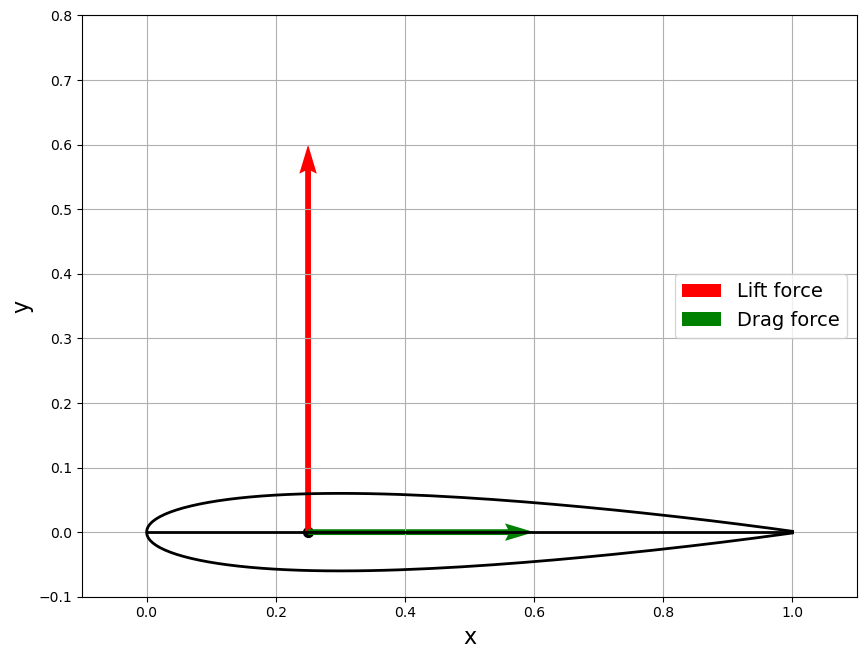

In [3]:
# Example Geometry and forces visualization

L = 0.8
# Define the x and y coordinates of the NACA0012 airfoil
x, y = np.loadtxt('NACA0012.txt', delimiter='\t', unpack=True)
xc, yc = np.loadtxt('chord.txt', delimiter='\t', unpack=True)
chord_cordinates = [0.25, 0]

# plot geometry
width = 10
plt.figure(figsize=(width, width))
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x, y, color='k', linestyle='-', linewidth=2)
plt.plot(xc, yc, color='black', linestyle='-', linewidth=2)
plt.scatter(chord_cordinates[0], chord_cordinates[1], color='black', marker='o', s=50)
plt.axis('scaled')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, L)

#Define lift vector
vectors = [[chord_cordinates[0], chord_cordinates[1], chord_cordinates[0], (L-0.2)], [chord_cordinates[0], chord_cordinates[1], (L-0.2), 0]]
vectors = np.array(vectors)
U = vectors[:, 2] - vectors[:, 0]
V = vectors[:, 3] - vectors[:, 1]
plt.quiver(vectors[0, 0], vectors[0, 1], U[0], V[0], angles='xy', scale_units='xy', scale=1, color="red", label="Lift force")
plt.quiver(vectors[1, 0], vectors[1, 1], U[1], V[1], angles='xy', scale_units='xy', scale=1, color="green", label="Drag force")
plt.legend(loc='center right', prop={'size':14})
plt.show

##### Center of Pressure
At each value of the lift coefficient there will be one particular point about which the pitching moment coefficient is zero, and the aerodynamic effects on the airfoil section may be represented by the lift and the drag alone acting at that point. This special point is termed the center of pressure.
We know that for a symmetric airfoil, as angle of attack and lift coefficient change, the center of pressure does not move. It remains around the quarter-chord point for angles of attack below the stalling angle of attack.(red dot)

The contour defining the airfoil will be partitioned into N-numbers of panels

In [4]:
class Panel:
    """
    Contains information related to a panel.
    """
    def __init__(self, xa, ya, xb, yb):
        """
        Initializes the panel.
        
        Sets the end-points and calculates the center-point, length,
        and angle (with the x-axis) of the panel.
        Defines if the panel is located on the upper or lower surface of the geometry.
        Initializes the source-strength, tangential velocity, and pressure coefficient
        of the panel to zero.
        
        Parameters
        ---------_
        xa: float
            x-coordinate of the first end-point.
        ya: float
            y-coordinate of the first end-point.
        xb: float
            x-coordinate of the second end-point.
        yb: float
            y-coordinate of the second end-point.
        """
        self.xa, self.ya = xa, ya  # panel starting-point
        self.xb, self.yb = xb, yb  # panel ending-point
        
        self.xc, self.yc = (xa + xb) / 2, (ya + yb) / 2  # panel center
        self.length = np.sqrt((xb - xa)**2 + (yb - ya)**2)  # panel length
        
        # orientation of panel (angle between x-axis and panel's normal)
        if xb - xa <= 0.0:
            self.beta = np.arccos((yb - ya) / self.length)
        elif xb - xa > 0.0:
            self.beta = np.pi + np.arccos(-(yb - ya) / self.length)
        
        # panel location
        if self.beta <= np.pi:
            self.loc = 'upper'  # upper surface
        else:
            self.loc = 'lower'  # lower surface
        
        self.sigma = 0.0  # source strength
        self.vt = 0.0  # tangential velocity
        self.cp = 0.0  # pressure coefficient

Discretize the airfoil geometry in N panels. The function will return a NumPy array of N objects of the type Panel.

In [5]:
def define_panels(x, y, N=40):
    """
    Discretizes the geometry into panels using 'cosine' method.
    
    Parameters
    ----------
    x: 1D array of floats
        x-coordinate of the points defining the geometry.
    y: 1D array of floats
        y-coordinate of the points defining the geometry.
    N: integer, optional
        Number of panels;
        default: 40.
    
    Returns
    -------
    panels: 1D Numpy array of Panel objects.
        The list of panels.
    """
    
    R = (x.max() - x.min()) / 2.0  # circle radius
    x_center = (x.max() + x.min()) / 2.0  # x-coordinate of circle center
    
    theta = np.linspace(0.0, 2.0 * np.pi, N + 1)  # array of angles
    x_circle = x_center + R * np.cos(theta)  # x-coordinates of circle
    
    x_ends = np.copy(x_circle)  # x-coordinate of panels end-points
    y_ends = np.empty_like(x_ends)  # y-coordinate of panels end-points
    
    # extend coordinates to consider closed surface
    x, y = np.append(x, x[0]), np.append(y, y[0])
    
    # compute y-coordinate of end-points by projection
    I = 0
    for i in range(N):
        while I < len(x) - 1:
            if (x[I] <= x_ends[i] <= x[I + 1]) or (x[I + 1] <= x_ends[i] <= x[I]):
                break
            else:
                I += 1
        a = (y[I + 1] - y[I]) / (x[I + 1] - x[I])
        b = y[I + 1] - a * x[I + 1]
        y_ends[i] = a * x_ends[i] + b
    y_ends[N] = y_ends[0]
    
    # create panels
    panels = np.empty(N, dtype=object)
    for i in range(N):
        panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i + 1], y_ends[i + 1])
    
    return panels

Now we can use our new function to define the geometry for the airfoil panels, and then plot the panel nodes on the geometry.

In [6]:
# discretize geoemetry into panels
panels = define_panels(x, y, N=40)

(-0.1, 0.1)

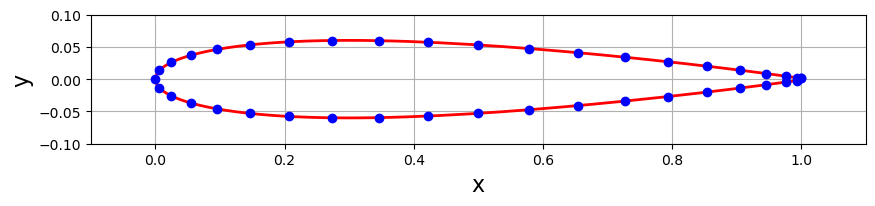

In [7]:
# plot discretized geometry
width = 10
plt.figure(figsize=(width, width))
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x, y, color='r', linestyle='-', linewidth=2)
plt.plot(np.append([panel.xa for panel in panels], panels[0].xa),
            np.append([panel.ya for panel in panels], panels[0].ya),
            linestyle='-', linewidth= 0.01, marker= 'o', markersize= 6, c= 'b')
plt.axis('scaled')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 0.1)

##### Free stream conditions

The airfoil is immersed in a free-stream $(U_\infty$,$\alpha)$ where $U_\infty$ and $\alpha$ are the velocity magnitude and angle of attack, respectively.

In [8]:
class Freestream:
    """
    Freestream conditions.
    """
    def __init__(self, u_inf=1.0, alpha=0.0):
        """
        Sets the freestream speed and angle (in degrees).
        
        Parameters
        ----------
        u_inf: float, optional
            Freestream speed;
            default: 1.0.
        alpha: float, optional
            Angle of attack in degrees;
            default 0.0.
        """
        self.u_inf = u_inf
        self.alpha = np.radians(alpha)  # degrees to radians

We may manipulate *freestream conditions* to see the effect

In [9]:
# define freestream conditions
freestream = Freestream(u_inf=1.5, alpha=5.0)

In [10]:
def integral(x, y, panel, dxdk, dydk):
    """
    Evaluates the contribution from a panel at a given point.
    
    Parameters
    ----------
    x: float
        x-coordinate of the target point.
    y: float
        y-coordinate of the target point.
    panel: Panel object
        Panel whose contribution is evaluated.
    dxdk: float
        Value of the derivative of x in a certain direction.
    dydk: float
        Value of the derivative of y in a certain direction.
    
    Returns
    -------
    Contribution from the panel at a given point (x, y).
    """
    def integrand(s):
        return (((x - (panel.xa - np.sin(panel.beta) * s)) * dxdk +
                 (y - (panel.ya + np.cos(panel.beta) * s)) * dydk) /
                ((x - (panel.xa - np.sin(panel.beta) * s))**2 +
                 (y - (panel.ya + np.cos(panel.beta) * s))**2) )
    options={'limit':100}
    return integrate.quad(integrand, 0.0, panel.length, limit=180)[0]

We first define the function source_contribution_normal to build the source matrix, i.e. the weight from each source on the normal velocity of each panel:

In [11]:
def source_contribution_normal(panels):
    """
    Builds the source contribution matrix for the normal velocity.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    
    Returns
    -------
    A: 2D Numpy array of floats
        Source contribution matrix.
    """
    A = np.empty((panels.size, panels.size), dtype=float)
    # source contribution on a panel from itself
    np.fill_diagonal(A, 0.5)
    # source contribution on a panel from others
    for i, panel_i in enumerate(panels):
        for j, panel_j in enumerate(panels):
            if i != j:
                A[i, j] = 0.5 / np.pi * integral(panel_i.xc, panel_i.yc, 
                                                    panel_j,
                                                    np.cos(panel_i.beta),
                                                    np.sin(panel_i.beta))
    return A

Then, we define vortex_contribution_normal to build the vortex matrix:

In [12]:
def vortex_contribution_normal(panels):
    """
    Builds the vortex contribution matrix for the normal velocity.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    
    Returns
    -------
    A: 2D Numpy array of floats
        Vortex contribution matrix.
    """
    A = np.empty((panels.size, panels.size), dtype=float)
    # vortex contribution on a panel from itself
    np.fill_diagonal(A, 0.0)
    # vortex contribution on a panel from others
    for i, panel_i in enumerate(panels):
        for j, panel_j in enumerate(panels):
            if i != j:
                A[i, j] = -0.5 / np.pi * integral(panel_i.xc, panel_i.yc, 
                                                     panel_j,
                                                     np.sin(panel_i.beta),
                                                     -np.cos(panel_i.beta))
    return A

Let's call both of these functions to create the source matrix A_source and the vortex matrix B_vortex:

In [13]:
A_source = source_contribution_normal(panels)
B_vortex = vortex_contribution_normal(panels)

We still have to include the Kutta condition in our system.

In [14]:
def kutta_condition(A_source, B_vortex):
    """
    Builds the Kutta condition array.
    
    Parameters
    ----------
    A_source: 2D Numpy array of floats
        Source contribution matrix for the normal velocity.
    B_vortex: 2D Numpy array of floats
        Vortex contribution matrix for the normal velocity.
    
    Returns
    -------
    b: 1D Numpy array of floats
        The left-hand side of the Kutta-condition equation.
    """
    b = numpy.empty(A_source.shape[0] + 1, dtype=float)
    # matrix of source contribution on tangential velocity
    # is the same than
    # matrix of vortex contribution on normal velocity
    b[:-1] = B_vortex[0, :] + B_vortex[-1, :]
    # matrix of vortex contribution on tangential velocity
    # is the opposite of
    # matrix of source contribution on normal velocity
    b[-1] = - numpy.sum(A_source[0, :] + A_source[-1, :])
    return b

The function build_singularity_matrix will gather together the source matrix, the vortex array, and the Kutta array to build the matrix needed to solve the linear system.

In [15]:
def build_singularity_matrix(A_source, B_vortex):
    """
    Builds the left-hand side matrix of the system
    arising from source and vortex contributions.
    
    Parameters
    ----------
    A_source: 2D Numpy array of floats
        Source contribution matrix for the normal velocity.
    B_vortex: 2D Numpy array of floats
        Vortex contribution matrix for the normal velocity.
    
    Returns
    -------
    A:  2D Numpy array of floats
        Matrix of the linear system.
    """
    A = numpy.empty((A_source.shape[0] + 1, A_source.shape[1] + 1), dtype=float)
    # source contribution matrix
    A[:-1, :-1] = A_source
    # vortex contribution array
    A[:-1, -1] = numpy.sum(B_vortex, axis=1)
    # Kutta condition array
    A[-1, :] = kutta_condition(A_source, B_vortex)
    return A

In [16]:
def build_freestream_rhs(panels, freestream):
    """
    Builds the right-hand side of the system 
    arising from the freestream contribution.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    freestream: Freestream object
        Freestream conditions.
    
    Returns
    -------
    b: 1D Numpy array of floats
        Freestream contribution on each panel and on the Kutta condition.
    """
    b = numpy.empty(panels.size + 1, dtype=float)
    # freestream contribution on each panel
    for i, panel in enumerate(panels):
        b[i] = -freestream.u_inf * numpy.cos(freestream.alpha - panel.beta)
    # freestream contribution on the Kutta condition
    b[-1] = -freestream.u_inf * (numpy.sin(freestream.alpha - panels[0].beta) +
                                 numpy.sin(freestream.alpha - panels[-1].beta) )
    return b

In [17]:
A = build_singularity_matrix(A_source, B_vortex)
b = build_freestream_rhs(panels, freestream)

To solve the linear system will use the Scipy function linalg.solve. Then we store the results in the attribute sigma of each Panel object. We also create a variable gamma to store the value of the constant vortex strength.

In [18]:
# solve for singularity strengths
strengths = numpy.linalg.solve(A, b)

# store source strength on each panel
for i , panel in enumerate(panels):
    panel.sigma = strengths[i]
    
# store circulation density
gamma = strengths[-1]

##### Surface pressure coefficient

The pressure coefficient at the $i$-th panel center is:

$$C_{p_i} = 1 - \left(\frac{V_{t_i}}{U_\infty}\right)^2$$

So, we have to compute the tangential velocity at each panel center using the function `compute_tangential_velocity`:

In [19]:
def compute_tangential_velocity(panels, freestream, gamma, A_source, B_vortex):
    """
    Computes the tangential surface velocity.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    freestream: Freestream object
        Freestream conditions.
    gamma: float
        Circulation density.
    A_source: 2D Numpy array of floats
        Source contribution matrix for the normal velocity.
    B_vortex: 2D Numpy array of floats
        Vortex contribution matrix for the normal velocity.
    """
    A = numpy.empty((panels.size, panels.size + 1), dtype=float)
    # matrix of source contribution on tangential velocity
    # is the same than
    # matrix of vortex contribution on normal velocity
    A[:, :-1] = B_vortex
    # matrix of vortex contribution on tangential velocity
    # is the opposite of
    # matrix of source contribution on normal velocity
    A[:, -1] = -numpy.sum(A_source, axis=1)
    # freestream contribution
    b = freestream.u_inf * numpy.sin([freestream.alpha - panel.beta 
                                      for panel in panels])
    
    strengths = numpy.append([panel.sigma for panel in panels], gamma)
    
    tangential_velocities = numpy.dot(A, strengths) + b
    
    for i, panel in enumerate(panels):
        panel.vt = tangential_velocities[i]

In [20]:
# tangential velocity at each panel center.
compute_tangential_velocity(panels, freestream, gamma, A_source, B_vortex)

And we define a function compute_pressure_coefficient to compute the surface pressure coefficient:

In [21]:
def compute_pressure_coefficient(panels, freestream):
    """
    Computes the surface pressure coefficients.
    
    Parameters
    ----------
    panels: 1D array of Panel objects
        List of panels.
    freestream: Freestream object
        Freestream conditions.
    """
    for panel in panels:
        panel.cp = 1.0 - (panel.vt / freestream.u_inf)**2

In [22]:
# surface pressure coefficient
compute_pressure_coefficient(panels, freestream)

Plotting the pressure distribution $c_p$ through airfoil

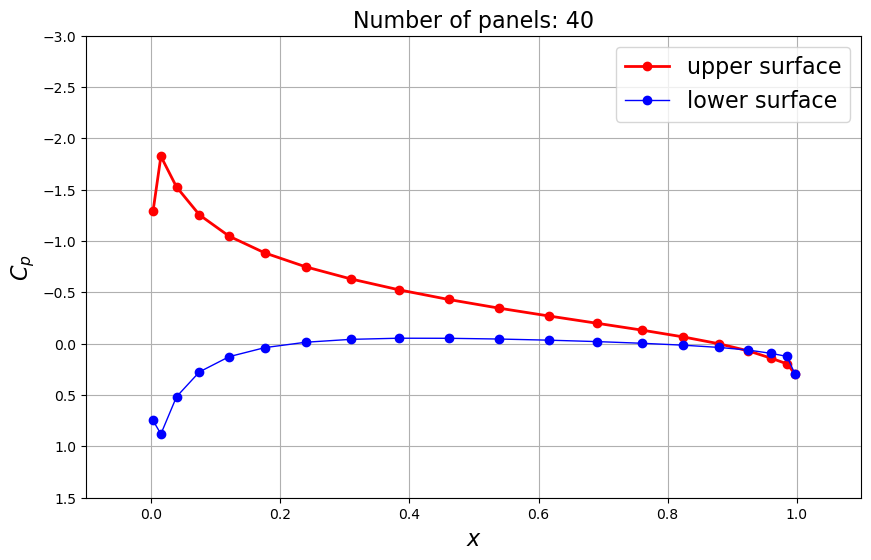

In [23]:
# plot surface pressure coefficient
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$C_p$', fontsize=16)
plt.plot([panel.xc for panel in panels if panel.loc == 'upper'],
            [panel.cp for panel in panels if panel.loc == 'upper'],
            label='upper surface',
            color='r', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.plot([panel.xc for panel in panels if panel.loc == 'lower'],
            [panel.cp for panel in panels if panel.loc == 'lower'],
            label= 'lower surface',
            color='b', linestyle='-', linewidth=1, marker='o', markersize=6)
plt.legend(loc='best', prop={'size':16})
plt.xlim(-0.1, 1.1)
plt.ylim(1.5, -3.0)
plt.title('Number of panels: {}'.format(panels.size), fontsize=16);

##### Accuracy check
First, let's compare it with XFOIL calculateted pressure coefficient distribution

<img src="Image/CpxXfoil.png" style="max-height:560px" /> 

Doesn't look too bad, does it?

We know that for a closed body, the sum of all the source strengths must be zero. If not, it means the body would be adding or absorbing mass from the flow! Therefore, we should have

$$\sum_{i=1}^{N} \sigma_i l_i = 0$$

where $l_i$ is the length of the $i^{\text{th}}$ panel.

With this, we can get a measure of the accuracy of the source panel method.

In [24]:
# calculate the accuracy
accuracy = sum([panel.sigma * panel.length for panel in panels])
print('sum of singularity strengths: {:0.6f}'.format(accuracy))

sum of singularity strengths: 0.007255


Computing the lift coefficient $c_L$

In [25]:
# compute the chord and lift coefficient
c = abs(max(panel.xa for panel in panels) -
        min(panel.xa for panel in panels))
cl = (gamma * sum(panel.length for panel in panels) /
      (0.5 * freestream.u_inf * c))
print('Lift coefficient: CL = {:0.3f}'.format(cl))

Lift coefficient: CL = 0.535


So, we have computed our lift coefficient $c_l$ for $\alpha = 5^\circ$, let's compare it with the one calculated by XFOIL. 

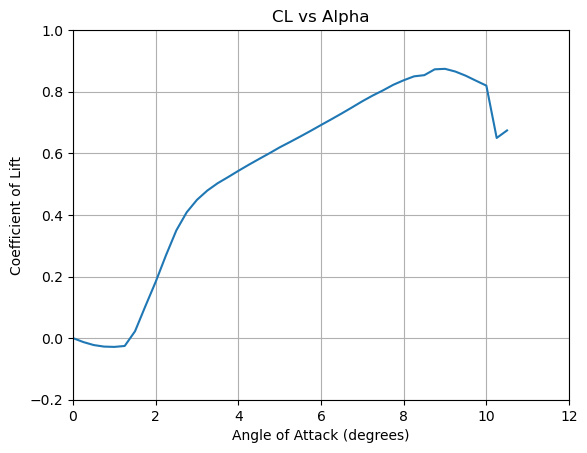

In [26]:
# Read data from polar.txt
data = np.genfromtxt('polar.txt', skip_header=12)

# Extract data columns
alpha = data[:, 0]
cl_xfoil = data[:, 1]
# Plot CL vs alpha
plt.plot(alpha, cl_xfoil)
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Coefficient of Lift')
plt.title('CL vs Alpha')
plt.xlim(0, 12)
plt.ylim(-0.2, 1)
plt.grid()
plt.show()

We see that there is small discrepancy introduced due to different characteristics of the freestream, especialy the Reynolds number.

Now, we can calculate lift, $S = 1$

$$L = C_L q_{\infty}S$$

In [27]:
L = cl * freestream.u_inf
print(f'{L:.2f}')

0.80


##### Streamlines onto a mesh grid

To get a streamline plot, we have to create a mesh and compute the velocity field onto it. Knowing the strength of every panel, we find the $x$-component of the velocity by taking derivative of the velocity potential in the $x$-direction, and the $y$-component by taking derivative in the $y$-direction:

$$
u\left(x,y\right) = \frac{\partial}{\partial x}\left\lbrace \phi\left(x,y\right) \right\rbrace
$$

$$
v\left(x,y\right) = \frac{\partial}{\partial y}\left\lbrace \phi\left(x,y\right) \right\rbrace
$$

Notice that here we call the function `integral()` with $1,0$ as the final arguments when calculating the derivatives in the $x$-direction, and $0,1$ for the derivatives in th $y$-direction.

In [28]:
def get_velocity_field(panels, freestream, X, Y):
    """
    Computes the velocity field on a given 2D mesh.
    
    Parameters
    ---------
    panels: 1D array of Panel objects
        The source panels.
    freestream: Freestream object
        The freestream conditions.
    X: 2D Numpy array of floats
        x-coordinates of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # freestream contribution
    u = freestream.u_inf * math.cos(freestream.alpha) * numpy.ones_like(X, dtype=float)
    v = freestream.u_inf * math.sin(freestream.alpha) * numpy.ones_like(X, dtype=float)
    # add the contribution from each source (superposition powers!!!)
    vec_intregral = numpy.vectorize(integral)
    for panel in panels:
        u += panel.sigma / (2.0 * math.pi) * vec_intregral(X, Y, panel, 1.0, 0.0)
        v += panel.sigma / (2.0 * math.pi) * vec_intregral(X, Y, panel, 0.0, 1.0)
    
    return u, v

In [29]:
# define a mesh grid
nx, ny = 20, 20  # number of points in the x and y directions
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.3, 0.3
X, Y = numpy.meshgrid(numpy.linspace(x_start, x_end, nx),
                      numpy.linspace(y_start, y_end, ny))

# compute the velocity field on the mesh grid
u, v = get_velocity_field(panels, freestream, X, Y)

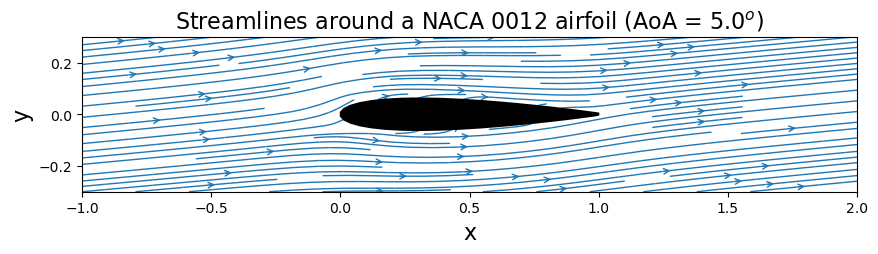

In [30]:
# plot the velocity field
width = 10
plt.figure(figsize=(width, width))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.streamplot(X, Y, u, v,
                  density=1, linewidth=1, arrowsize=1, arrowstyle='->')
plt.fill([panel.xc for panel in panels],
            [panel.yc for panel in panels],
            color='k', linestyle='solid', linewidth=2, zorder=2)
plt.axis('scaled')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.title('Streamlines around a NACA 0012 airfoil (AoA = ${}^o$)'.format(np.rad2deg(freestream.alpha)),
             fontsize=16);

 For an airfoil, we are interested to see how the pressure looks all around it, and we make a contour plot in the flow domain.

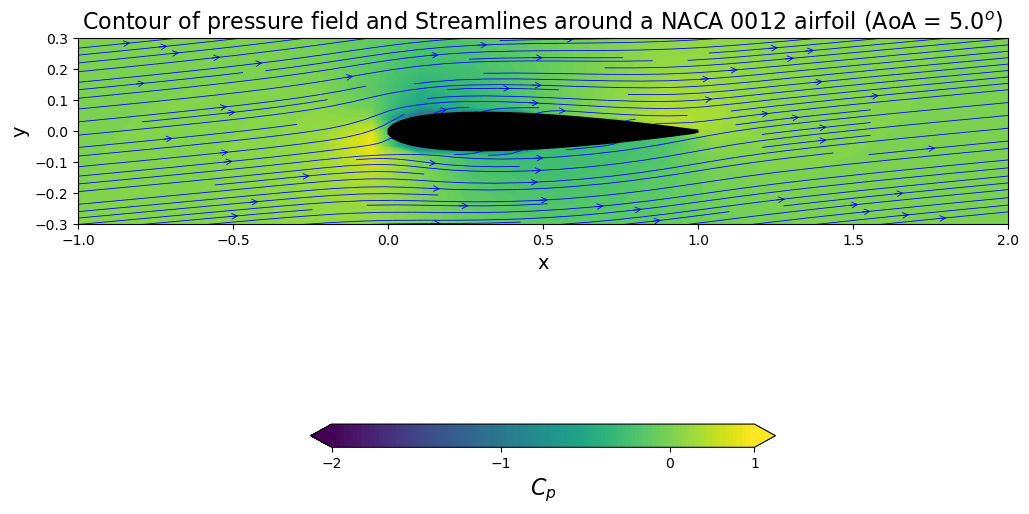

In [31]:
# Compute the pressure field
cp = 1.0 - (u ** 2 + v ** 2) / freestream.u_inf ** 2

# Plot the pressure field
plt.figure(figsize=(12, 8))
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

# Contour plot of pressure field
contf = plt.contourf(X, Y, cp, levels=np.linspace(-2.0, 0.5, 100), extend='both')

# Colorbar
cbar = plt.colorbar(contf, orientation='horizontal', shrink=0.5, pad=0.1, ticks=[-2.0, -1.0, 0.0, 1.0])
cbar.set_label('$C_p$', fontsize=16)

# Streamlines plot
plt.streamplot(X, Y, u, v, density=1, linewidth=0.6, arrowsize=1, color="blue", arrowstyle='->')

# Airfoil outline
plt.fill([panel.xc for panel in panels], [panel.yc for panel in panels],
         color='k', linestyle='solid', linewidth=2, zorder=2)

# Axes and title
plt.axis('scaled')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.title('Contour of pressure field and Streamlines around a NACA 0012 airfoil (AoA = ${}^o$)'.format(
    np.rad2deg(freestream.alpha)), fontsize=16)

plt.show()


Now, let's try using *quiver* instead of *streamplot* to plot the streamlines:

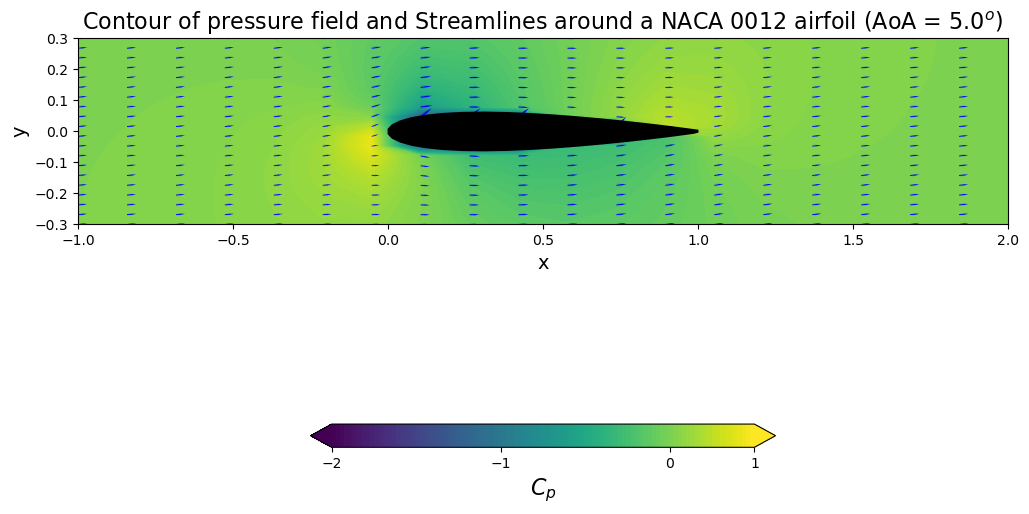

In [32]:
# Compute the pressure field
cp = 1.0 - (u ** 2 + v ** 2) / freestream.u_inf ** 2

# Plot the pressure field
plt.figure(figsize=(12, 8))
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

# Contour plot of pressure field
contf = plt.contourf(X, Y, cp, levels=np.linspace(-2.0, 0.5, 100), extend='both')

# Colorbar
cbar = plt.colorbar(contf, orientation='horizontal', shrink=0.5, pad=0.1, ticks=[-2.0, -1.0, 0.0, 1.0])
cbar.set_label('$C_p$', fontsize=16)

# Streamlines plot using quiver
plt.quiver(X, Y, u, v, angles='xy',linestyle='dashed', scale_units='x', headlength=10, scale=50, color='b')

# Airfoil outline
plt.fill([panel.xc for panel in panels], [panel.yc for panel in panels],
         color='k', linestyle='solid', linewidth=2, zorder=2)

# Axes and title
plt.axis('scaled')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.title('Contour of pressure field and Streamlines around a NACA 0012 airfoil (AoA = ${}^o$)'.format(
    np.rad2deg(freestream.alpha)), fontsize=16)

plt.show()


##### What can be achieved

The vortex panel method has been successfully applied to analyze the flow around the airfoil. The pressure coefficient $C_p$ distribution along the airfoil surface has been computed, providing valuable insights into the aerodynamic characteristics of the airfoil. The contour plot of $C_p$ illustrates the variation of pressure over the airfoil surface, highlighting regions of higher and lower pressures.

The lift coefficient $C_L$ has also been calculated using the computed Cp distribution and the freestream conditions. $C_L$ provides an important measure of the aerodynamic lift generated by the airfoil. It is a key parameter for determining the airfoil's performance and its ability to generate lift at different angles of attack.

The code effectively visualizes the Cp distribution and streamlines around the airfoil. The contour plot helps identify regions of high and low pressure, while the streamlines depict the flow patterns around the airfoil. The visualizations of flow patterns around the airfoil and $C_p$ distribution provided a comprehensive understanding of the flow behavior and aerodynamic forces acting on the airfoil.

The vortex panel method offers a computationally efficient approach for analyzing airfoil aerodynamics by discretizing the airfoil surface into panels and modeling the flow using vortex panels. It provides reasonably accurate results while avoiding the complexities associated with more intricate numerical methods.

##### What can't be achieved

While the vortex panel method is one of the simplest methods for calculating pressure distribution and analyzing airfoil aerodynamics, it does come with certain limitations. These limitations should be considered when interpreting its results. Some of the key limitations of the vortex panel method include:

1. Two-dimensional Flow: The vortex panel method is specifically designed for analyzing two-dimensional flow around airfoils. It does not account for three-dimensional effects such as spanwise flow variations or wingtip vortices. Therefore, it may not accurately capture the flow behavior in complex three-dimensional configurations.

2. Inviscid Flow Assumption: The vortex panel method assumes inviscid flow, neglecting the effects of viscosity and boundary layer separation. This assumption can limit the accuracy of the results, especially in regions of flow separation or near the airfoil's surface where viscous effects are significant.

3. Panel Distribution: The accuracy of the results depends on the distribution and density of the panels used to discretize the airfoil surface. Insufficient panel density or inappropriate panel placement can lead to inaccuracies in the calculated pressures, particularly in regions of high curvature or flow separation.

4. Potential Flow Approximation: The vortex panel method is based on the potential flow theory, which assumes irrotational and incompressible flow. This approximation does not account for the effects of compressibility, shock waves, or real gas behavior, limiting its applicability to low-speed flows.

5. Angle of Attack Range: The accuracy of the vortex panel method can degrade at high angles of attack or when the flow becomes highly separated. It may struggle to capture the complex flow phenomena and accurately predict the resulting forces and moments.

6. Linearized Theory: The vortex panel method utilizes linearized potential flow theory, assuming small perturbations around the freestream conditions. This linearization restricts its accuracy for highly nonlinear flows, such as those encountered during stall or dynamic maneuvers.

7. Prandtl-Glauert Correction: The vortex panel method does not inherently incorporate the Prandtl-Glauert correction for flow speeds approaching or exceeding the speed of sound. It is primarily suitable for subsonic and transonic flow regimes.

8. Limitations in Complex Geometries: The vortex panel method becomes increasingly challenging to apply accurately in cases involving complex airfoil shapes, multiple airfoils, or aerodynamic interactions between components such as wings, fuselages, or control surfaces.

Considering these limitations, it is important to exercise caution and understand the assumptions and constraints of the vortex panel method when interpreting its results. In cases where higher accuracy or consideration of three-dimensional effects is necessary, more advanced numerical methods, such as computational fluid dynamics (CFD), may be more suitable.







## Conclusion - aerodynamics of an airfoil

Principles of lift and drag are utilized in various fields to optimize performance, efficiency, and safety. By understanding and applying these principles, engineers and designers can create innovative solutions that leverage aerodynamic forces to achieve desired outcomes.

Understanding the aerodynamics of airfoils is crucial not only for aviation but also for various industries, including:

1. Wind Energy: The blades of wind turbines are designed as airfoils to maximize lift and rotation, converting wind energy into mechanical energy. By carefully controlling the angle of attack and blade shape, wind turbines can capture more wind energy, thereby improving their efficiency and power generation capabilities.

2. Sports Equipment: Many sports rely on the principles of lift and drag for optimal performance. For example, in sports like golf and tennis, the design of golf balls and tennis rackets incorporates aerodynamic features to generate lift and reduce drag. This allows for greater control, distance, and accuracy in the sport.

3. Automotive Engineering: In the automotive industry, the principles of lift and drag are crucial for designing efficient and aerodynamically optimized vehicles. Car manufacturers shape the body of vehicles to reduce drag, improve fuel efficiency, and enhance stability at high speeds. Rear spoilers and diffusers are used to manipulate airflow and generate downforce, increasing traction and improving vehicle handling.

4. Marine Engineering: Naval architects and shipbuilders employ lift and drag principles in the design of ships and submarines. Hydrofoils and wings on ships and sailboats generate lift, reducing drag and increasing speed (***Airbus-Designed Boat***). By optimizing the shape and surface characteristics of underwater hulls, ships can minimize drag and enhance fuel efficiency.

5. Sports Parachutes:  Parachutes in sports such as skydiving and base jumping rely on the principles of lift and drag to control descent. By manipulating the shape and surface area of the parachute, the rate of descent and maneuverability can be controlled, making a landing possible.

6. Cycling: In competitive cycling, aerodynamic considerations are essential for achieving higher speeds. Bicycles, helmets and clothing, are designed to minimize drag and enhance aerodynamic efficiency. Streamlined shapes, reduced frontal area, and optimized airflow around the rider contribute to improved performance and reduced energy expenditure.

## References:

1. Anderson J. Fundamentals of Aerodynamics.
2. Wikipedia.org.
3. AeroPython student projects.
4. Countless internet sources for information verification and ideas.